# Exploring Acceleration and Gyroscope Sensors in Mobile with Phyphox App: An Experiment

### Instructions:
1. Using the experiment you created acquire acceleration and gyroscope sensor data for 60 seconds in “low noise environment” (no vibrations, walking around, touching the phone). 
2. Export the data to .csv / Excel file.
3. Plot the accelerometer data (x,y,z) on y-axis versus time (x-axis) with Python. Save plots as .png files. Do the same for gyroscope (x,y,z).
4. Repeat 1), 2) and 3) with phone connected to charger-charging.

### My Experience About Phyphox App:
- The Phyphox app offers an excellent opportunity for students to gain practical experience with sensors and explore scientific concepts through conducting physics experiments. With an engaging interface and accessible features, the app provides a valuable resource for learning about physics and sensors.
>
- In my personal experience, I found the Phyphox app to be particularly useful for learning sensors. The app offers a wide range of sensors to try out, but I found that the Mechanics section sensors is the most interesting and informative.

###### Note:
- My mobile phone does not have a pressure sensor or a depth sensor.

### About Accelerometer:
- The accelerometer is an electromechanical device that **measures the force of acceleration caused by movement or by gravity or by vibration**. These forces can be static like gravity force, dynamic senses movement, or vibrations.

###### Accelerometer sensor in mobile:
- The accelerometer in smartphone measures the **linear acceleration of the device**. When at rest position in whatever orientation, the figure represents the force of gravity active on the device at the same time it also measures the acceleration on the X and Y axis which will be zero.
- In my experiments, I am **calculating acceleration without gravity using Phyphox app**.

###### Accelerometer sensor functionalities in mobile:
- The accelerometer in a mobile device is **used to control the user interface of various apps**, such as personal digital assistants and digital audio players. 
- It adjusts the orientation of the content and presentation of the app to make it more user-friendly.

- The accelerometer in a smartphone can also **track movement**, making it useful as a pedometer to count steps. Based on the step count, it enables users to get a detailed analysis of how many calories they have burned, how far they have walked, and more. Therefore, this sensor is widely used in health and fitness applications, as well as sports apps.


In [64]:
# To ignore exceptions
import warnings
warnings.filterwarnings('ignore')

In [65]:
# importing modules
import pandas as pd
import os
import matplotlib.pyplot as plt

### Accelerometer Sensor Experiment
- I performed the following three different experiments  
	1. walking
    2. Using an iron box
    3. Using paper
- After comparing the data results from all three experiments, I found that the paper experiment was the most appropriate and yielded the most accurate data.

##### How I did the experiment:
- Intially I placed a paper on floor and placed my phone on top of the paper. I moved the paper in x, y, z coordinates and observed the results. The results had more noise. So, I changed the setup, Now I placed a soomth cover on the floor and placed a paper above the cover and on top of that, placed a bubble cover to absorb the vibrations and reduce some noise.
- Initially, I moved the paper along the X-axis, followed by the Y-axis, and ultimately the Z-axis.
- I conducted the experiment under two conditions - one with charging and the other without charging.
- Below is the written source code to read sensor data files and plot the results.

#### Experiment Images

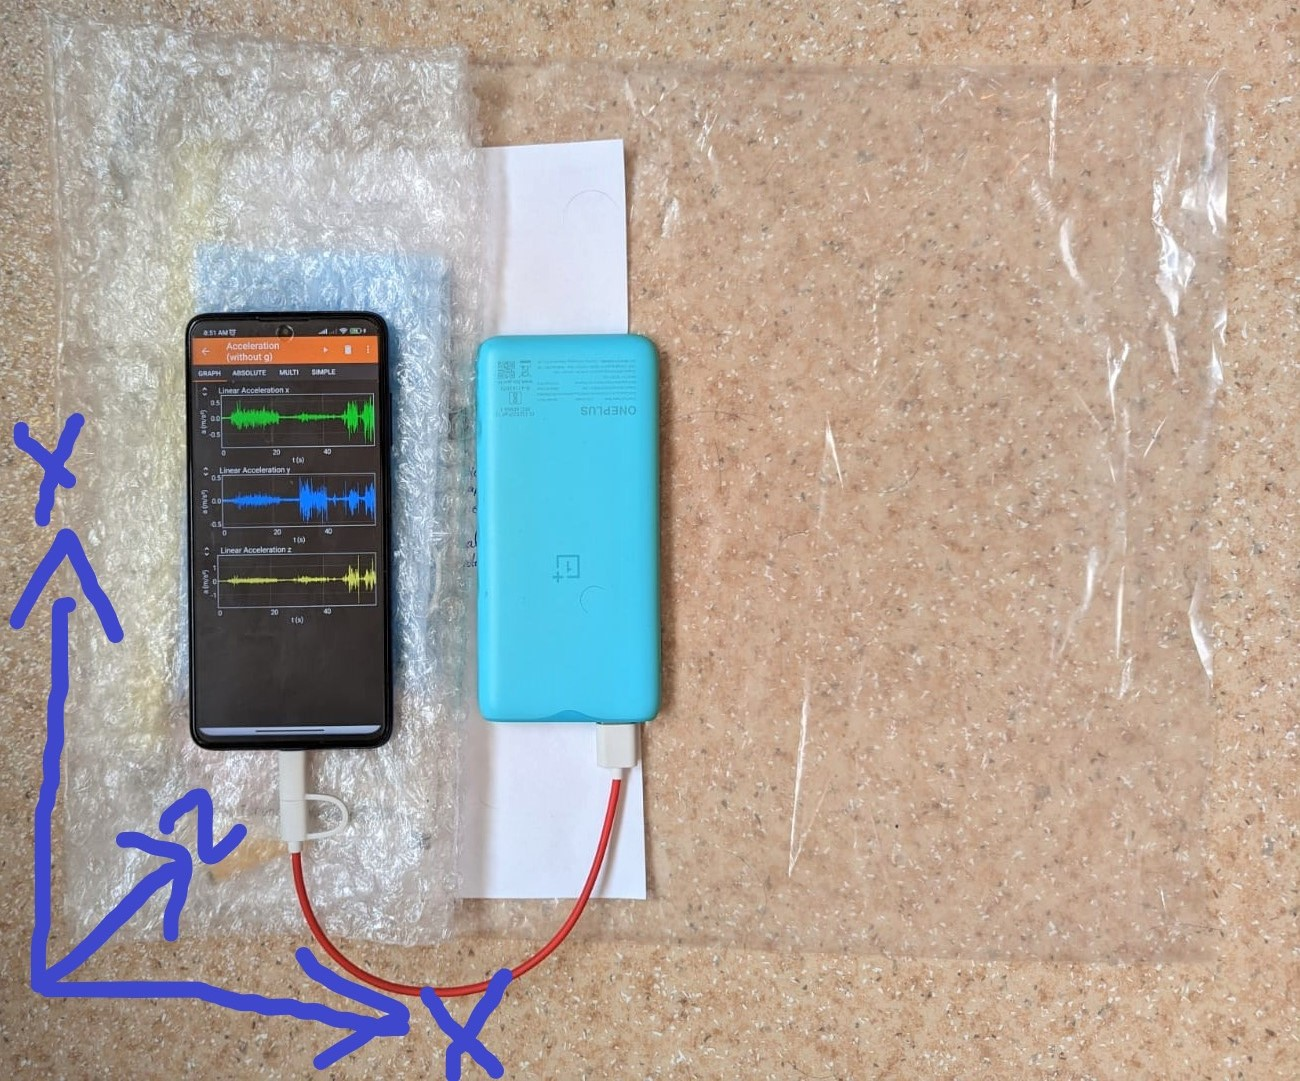

In [66]:
# experiement setup
from IPython.display import Image
Image(filename=r'C:\Users\Adapala\OneDrive\Desktop\Task\bosch\Datafiles\paper\experiment_setup.PNG')

##### Below Image displaying the trend of acceleration during the charging condition
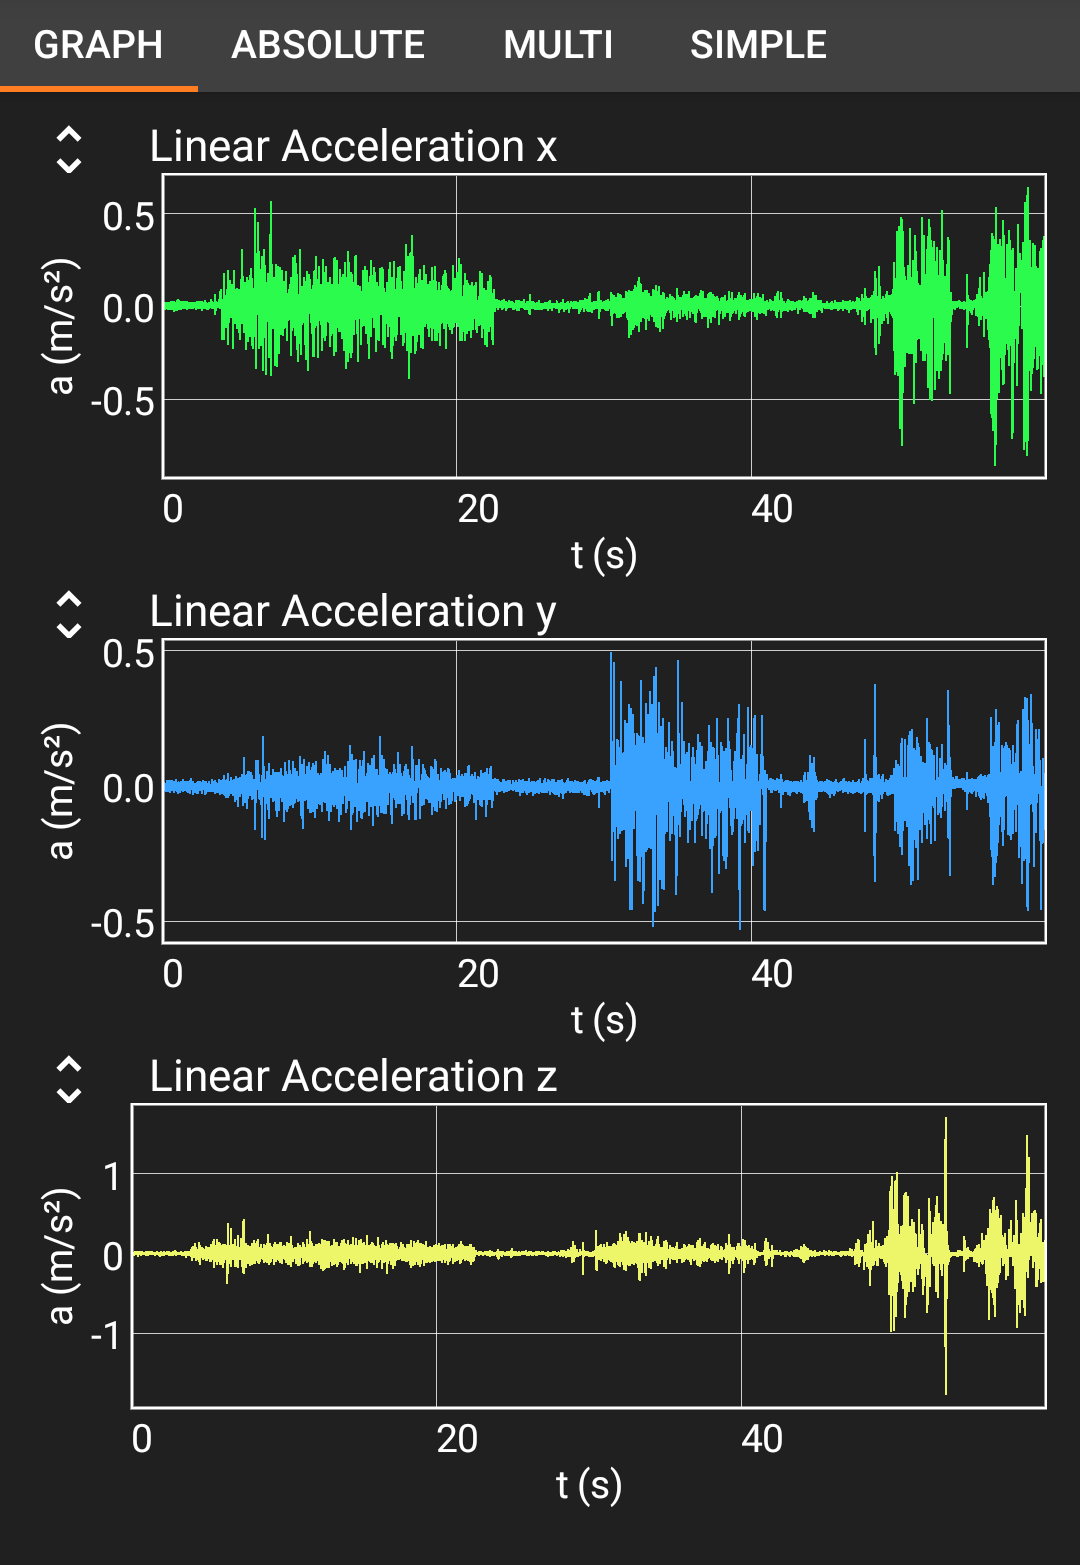

##### Below Image displaying the trend of acceleration during the Nocharging condition
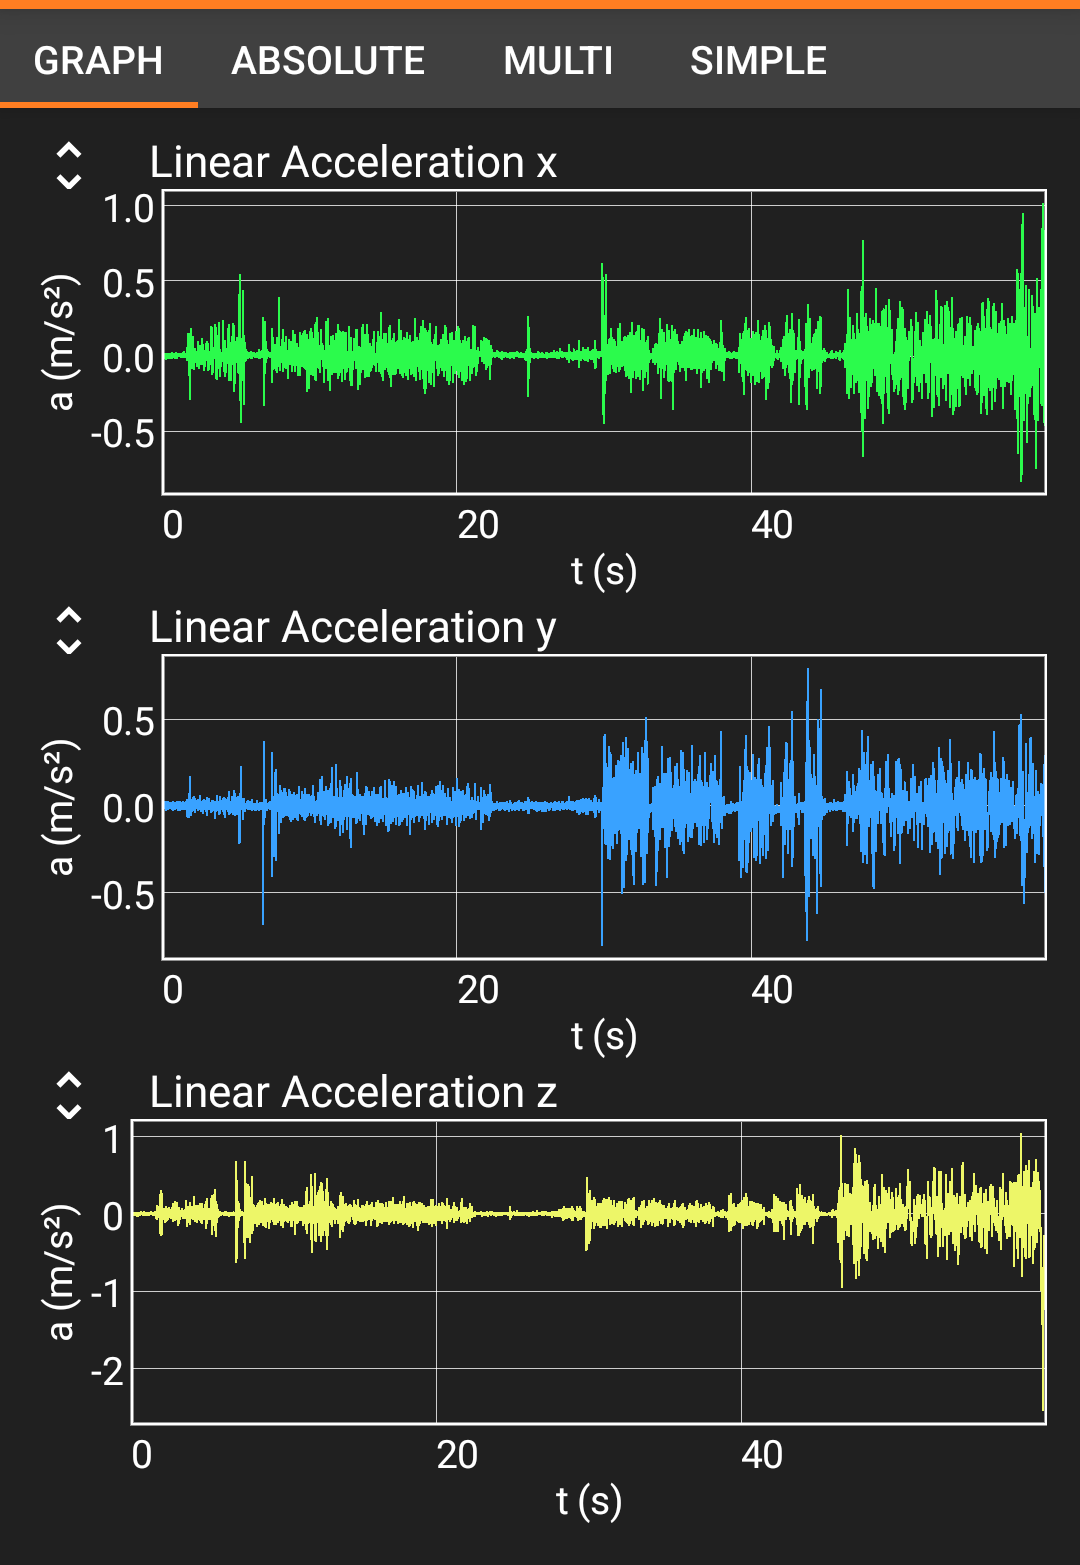

###### Acceleration using Accelerometer sensor without considering Gravitation (g)

In [67]:
""" By using the plotting function you can plot graghs between Time and Acceleration. 
	this function require 2 mandatory arguments
    1. acc_data: acceleration dataframe
    2. ext: file extention used to create png image. """

def acceleration_plotting(acc_data, ext: str):
    plt.figure(figsize=(17,20))
    plt.suptitle("Time Vs Accelerations", fontsize=20)
    total_col = len(acc_data.columns)
    x_val = acc_data[acc_data.columns[0]]
    
    for col_index in range(1,total_col):
        plt.subplot(total_col,1,col_index)
        plt.plot(x_val,  acc_data[acc_data.columns[col_index]], "r-", label= acc_data.columns[col_index], linewidth=0.2)
        plt.legend(loc= "upper left", shadow=True)
        plt.xlabel("Time (s)", fontdict={'color': 'red'})
        plt.ylabel("Acceleration (m/s$^2$)", fontdict={'color': 'red'})
        # Axis limits
        plt.xlim((min(x_val)-0.5, max(x_val)+0.5))
        plt.ylim((min(acc_data[acc_data.columns[col_index]]) - 0.5, max(acc_data[acc_data.columns[col_index]]) + 0.5))
        
    image_filename = f"{ext}.png"
    
    # make sure the file existed in the folder. otherwise it will raise an error
    plt.savefig(os.path.join("C:\\Users\\Adapala\\OneDrive\\Desktop\\Task\\bosch\\images\\acceleration_img", image_filename), dpi=800, facecolor="white")
    plt.show()




###### Velocity using acceleration without considering Gravitation (g)

In [68]:
""" using the velocity_graph function you can plot Time vs Velocity realtion.
	this function require 2 mandatory arguments
    1. acc_data: acceleration dataframe
    2. ext: file extention used to create png image."""

def velocity_plotting(acc_data, ext):
    # time interval 
    dt = acc_data[acc_data.columns[0]][0] - acc_data[acc_data.columns[0]][1]
    # lists to store the velocity data
    x_velocity = [0]
    y_velocity = [0]
    z_velocity = [0]
    
    for i in np.arange(len(acc_data[acc_data.columns[0]])-1):
        # calculating the velocity using the acceleration and time interval
        x_velocity = x_velocity + [x_velocity[-1] + acc_data[acc_data.columns[1]][i]*dt]
        y_velocity = y_velocity + [y_velocity[-1] + acc_data[acc_data.columns[2]][i]*dt]
        z_velocity = z_velocity + [z_velocity[-1] + acc_data[acc_data.columns[3]][i]*dt]
    plt.plot(acc_data[acc_data.columns[0]], x_velocity, label="V_x")
    plt.plot(acc_data[acc_data.columns[0]], y_velocity, label="V_y")
    plt.plot(acc_data[acc_data.columns[0]], z_velocity, label="V_z")
    plt.xlabel("Time (s)")
    plt.ylabel("Velocity (m/s)")
    plt.grid()
    plt.legend(loc= "upper left", shadow=True)
    
    # file name for png image
    st_list = ext.split("_")
    st_list[1] = "velocity"
    file_name = "_".join(st_list)
    image_filename = f"{file_name}.png"
    
    # make sure the file existed in the folder. otherwise it will raise an error
    plt.savefig(os.path.join("C:\\Users\\Adapala\\OneDrive\\Desktop\\Task\\bosch\\images\\velocity_img", image_filename), dpi=600, facecolor="white")
    plt.show()


###### Angular velocity using Gyroscope Sensor data

In [69]:
""" By using the plotting function you can plot graghs between Time and Gyroscope. 
	this function require 2 mandatory arguments
    1. gyro_data: gyroscope dataframe
    2. ext: file extention used to create png image. """

def gyro_plotting(gyro_data: str, ext: str):
    plt.figure(figsize=(17,20))
    plt.suptitle("Time Vs Angular Velocity", fontsize=20)
    total_col = len(gyro_data.columns)
    x_val = gyro_data[gyro_data.columns[0]]
    for col_index in range(1,total_col):
        plt.subplot(total_col,1,col_index)
        plt.plot(x_val, gyro_data[gyro_data.columns[col_index]], "b-", label= gyro_data.columns[col_index], linewidth=0.2)
        plt.legend(loc= "upper left", shadow=True)
        plt.xlabel("Time (s)", fontdict={'color': 'red'})
        plt.ylabel("Angular Velocity (rad/s)", fontdict={'color': 'red'})

        plt.xlim((min(x_val)-0.5, max(x_val)+0.5))
        plt.ylim((min(gyro_data[gyro_data.columns[col_index]]) -1, max(gyro_data[gyro_data.columns[col_index]]) + 1))

    image_filename = f"{ext}.png"
    
    # make sure the file existed in the folder. otherwise it will raise an error 
    plt.savefig(os.path.join("C:\\Users\\Adapala\\OneDrive\\Desktop\\Task\\bosch\\images\\gyro_img", image_filename), dpi=800, facecolor="white")
    plt.show()


In [70]:
""" This function reads sensor data file, creates a new dataframe using the Pandas module, \
	and calls plotting functions for acceleration, velocity, and angular velocity. It requires two mandatory arguments:
    1. file: the path to the data file
    2. add_name: used in an if condition to call appropriate functions. """
def main(file: str,add_name: str):
    
    file_path = file
    
    
    #  reading the csv using pandas module
    acc_data = pd.read_csv(file_path)
    
    # newdata Dataframe consist of [time, x acceleration, y acceleration, z acceleration] columns
    df_float = pd.DataFrame()
    
    df_float[acc_data.columns[0]] =  acc_data[acc_data.columns[0]]
    df_float[acc_data.columns[1]] =  acc_data[acc_data.columns[1]].astype(float)
    df_float[acc_data.columns[2]] =  acc_data[acc_data.columns[2]].astype(float)
    df_float[acc_data.columns[3]] =  acc_data[acc_data.columns[3]].astype(float)
    
    
    # to view the data details
    # print(df_float.describe())
    
    # calling the plottiong function
    if "gyro" not in add_name:
        acceleration_plotting(df_float, add_name)
        velocity_plotting(df_float, add_name)
    else:
        gyro_plotting(df_float, add_name)

### Using the Paper

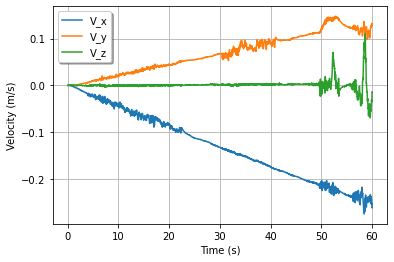

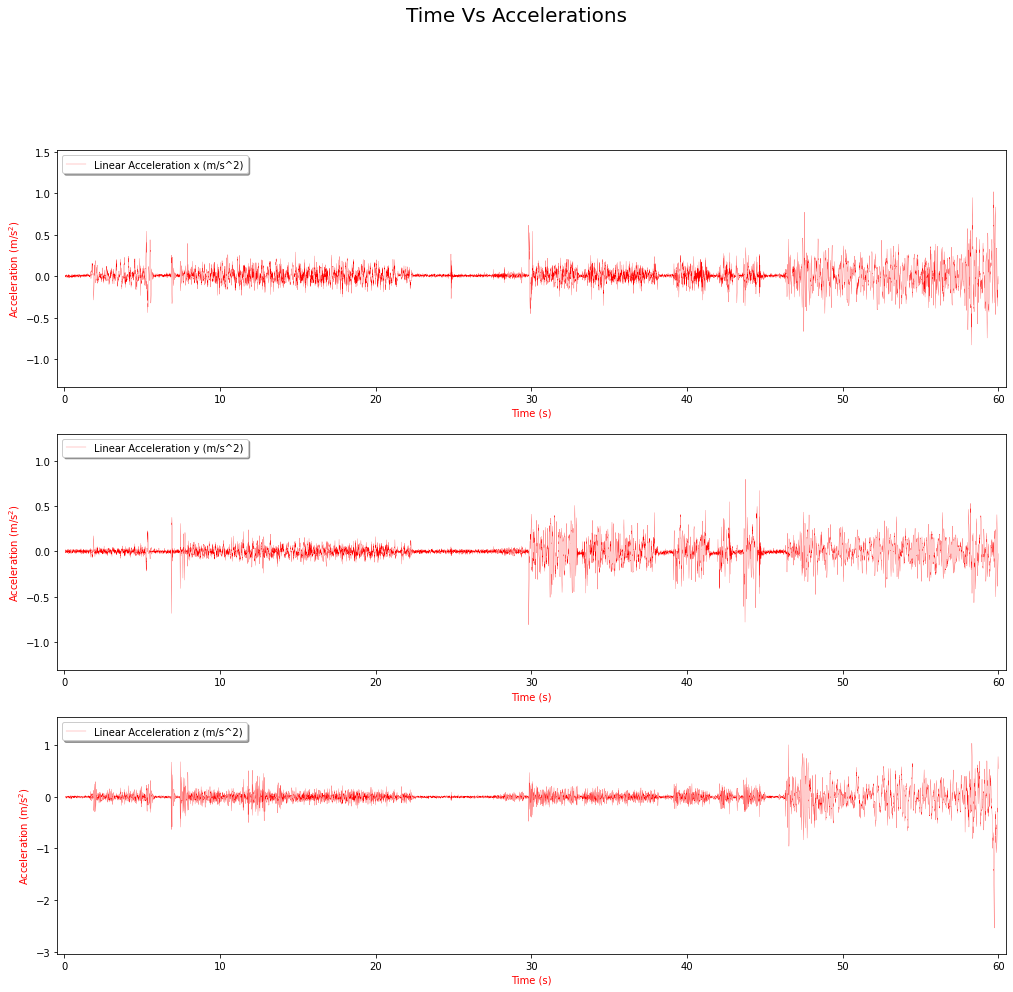

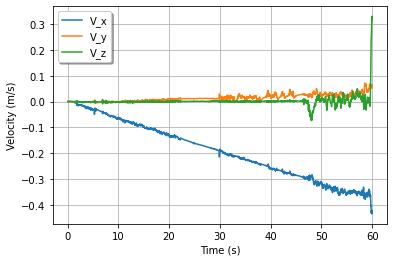

In [71]:
if __name__ == "__main__":
        
    # calling the main function with paper acceleration datafile with charging conditions
    main(r"C:\Users\Adapala\OneDrive\Desktop\Task\bosch\Datafiles\paper\paper_bubble_charging\Raw Data.csv", "paper_acceleration_charging")
    
    # calling the main function with paper acceleration datafile without charging conditions
    main(r"C:\Users\Adapala\OneDrive\Desktop\Task\bosch\Datafiles\paper\paper_bubble\Raw Data.csv","paper_acceleration_Nocharging")
    
    

### Accelerometer Sensor Experiment Observations:
- I observed from the graphs of **Time vs Linear Acceleration** that there was movement in the x direction initially, followed by a period of no movement, and then movement in the y direction. Moreover, small spikes were detected in the x and z directions during the y-axis movement. Finally, during the movement in the z direction, some motion was observed in the x and y directions as well. These irregularities were most probably caused by sudden motion, noise and handling errors.
- I also plotted the graphs of **Time vs Velocity** to observe the trend. However, since my time intervals were not constant, I noticed some deviations in the plot.
- I used a **power bank to charge my mobile phone**, which resulted in less fluctuation in acceleration values. However, the acceleration values were lower (deviations in Y and Z axis) compared to when the phone was not charging. 
- The **performance of the accelerometer sensor in a mobile phone can be impacted by its thermal conditions**. If the phone gets too hot, it can reduce the sensitivity of the sensor 
- My mobile having **linear_acceleration Range 156.99008** so the maximum possible value that can be measured by the accelerometer sensor is 156.99008 and **linear_acceleration Resolution 0.01** so the smallest increment of change that can be detected by the sensor is 0.01.
- While conducting experiments using an Iron box and walking, I noticed that vibrations and noise had an impact on the acceleration data.
- Below is the code which i have written for the other two experiments, **Iron box and Walking**.

### Iron Box
- I secured my phone to the handle of the iron box and moved it back and forth as well as from side to side.
- while moving the iron box, I observered significant noise so this can lead to inaccurate data.

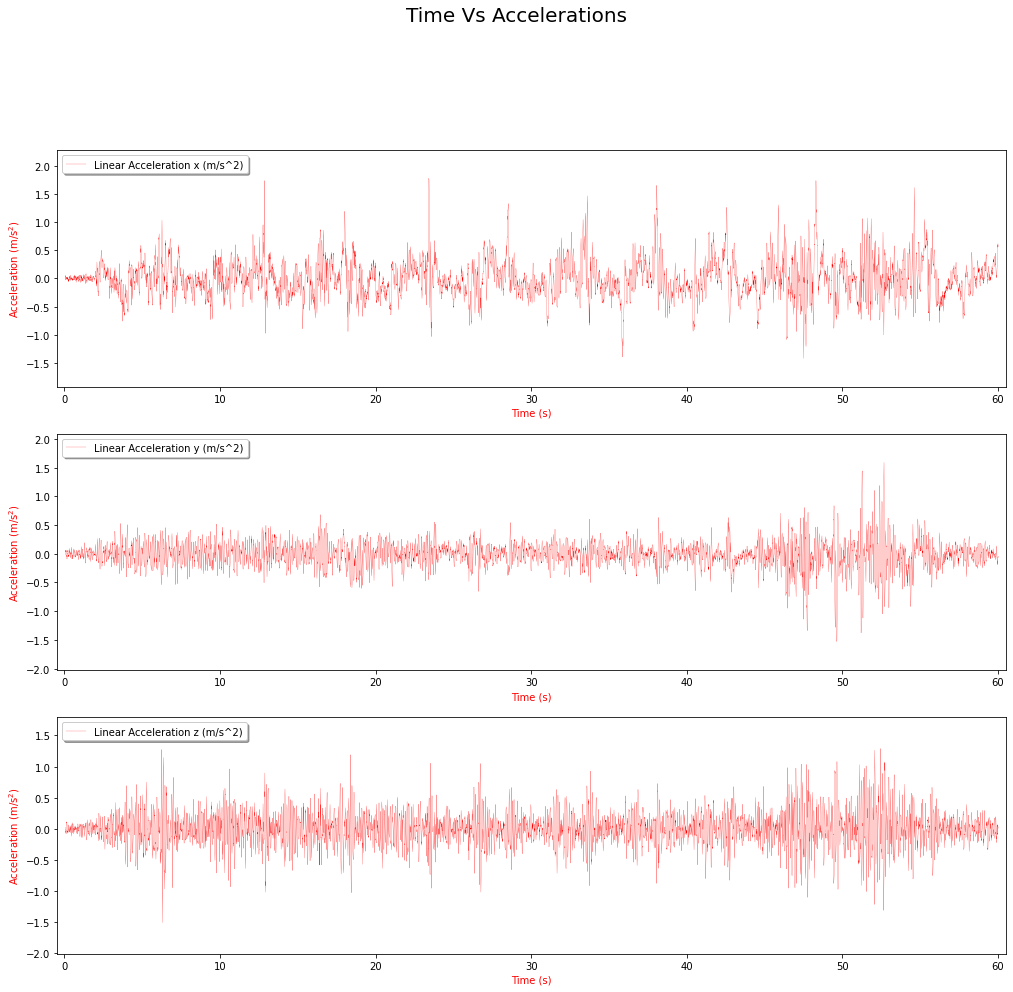

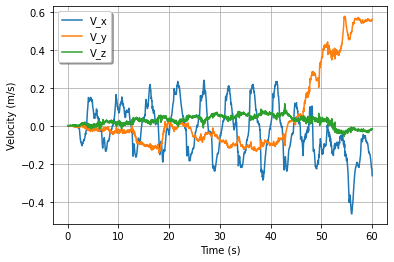

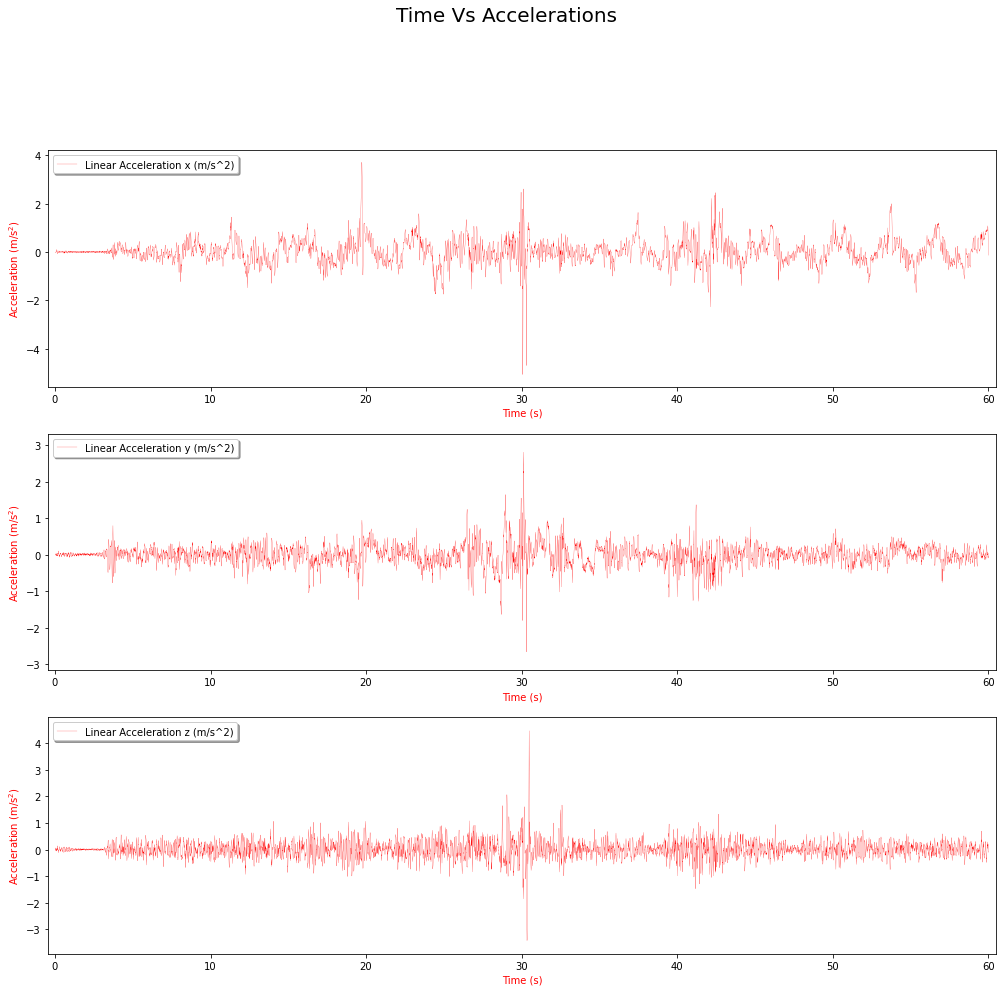

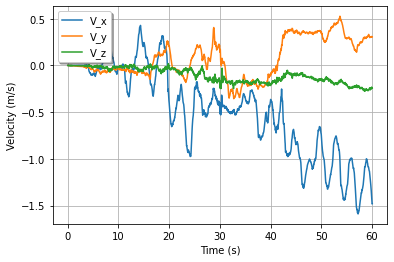

In [72]:
if __name__ == "__main__":
        
    # calling the main function with iron acceleration datafile with charging conditions
    main(r"C:\Users\Adapala\OneDrive\Desktop\Task\bosch\Datafiles\iron\iron_acceleration_charging\Raw Data.csv", "ironbox_acceleration_charging")
    
    # calling the main function with iron acceleration datafile without charging conditions
    main(r"C:\Users\Adapala\OneDrive\Desktop\Task\bosch\Datafiles\iron\iron_acceleration\Raw Data.csv","ironbox_acceleration_Nocharging")
    


### Walking

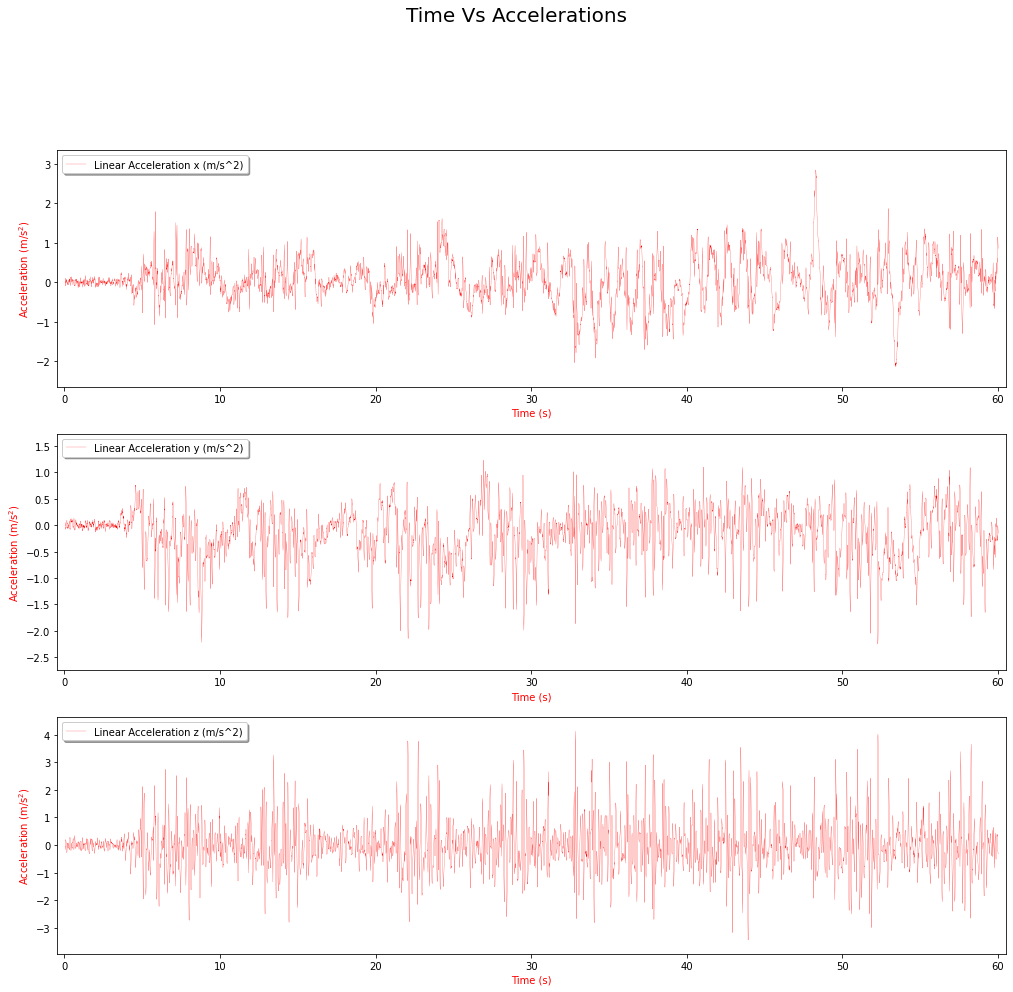

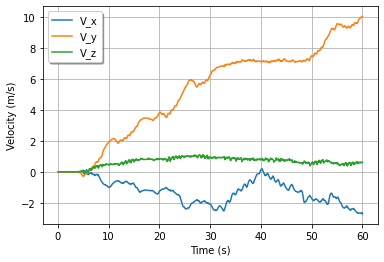

In [73]:
if __name__ == "__main__":
        
    # calling the main function with walking acceleration datafile with charging conditions
    main(r"C:\Users\Adapala\OneDrive\Desktop\Task\bosch\Datafiles\walking\walking_charging\Raw Data.csv", "walking_acceleration_charging")
    
    # calling the main function with walking acceleration datafile without charging conditions
    main(r"C:\Users\Adapala\OneDrive\Desktop\Task\bosch\Datafiles\walking\walking_nocharge\Raw Data.csv","walking_acceleration_Nocharging")
    

### About Gyroscope:
- A gyroscope is a device that **measures or maintains orientation and angular velocity**. It uses the principle of angular momentum to detect changes in the orientation of an object.

###### Gyroscope sensor in Mobile:
- A gyroscope sensor in a mobile device measures the angular velocity of the device around its three axes: X, Y, and Z. 
- This allows the device to **detect and respond to changes in its orientation and movement**. Unlike the accelerometer, the gyroscope can detect rotation or twist, making it ideal for applications that require precise motion tracking.

###### Gyroscope sensor Functionalities in Mobile:
- The gyroscope sensor is commonly used in **mobile gaming applications** to provide a more immersive experience. It allows the user to control the game by moving the device in a specific direction, which is then reflected in the game.

- The gyroscope sensor is also used in **various augmented reality (AR) and virtual reality (VR) applications and also in navigation and location-based services**.

### Gyroscope Sensor Experiment:
- While holding my mobile phone in my hands, I **moved it in a manner similar to playing a racing game**, allowing the gyroscope sensor to track its movements along the x, y, and z-axes and provide data on its orientation and rotational motion. The collected data was then used to plot the relation between time and angular velocity. Moreover, this experiment can be used to evaluate the performance of different mobile phones and compare the accuracy of their gyroscope sensors.
#### source code Explanation:
	- created 2 functions **main** and **gyro_plotting**.
	- **main function** reads sensor data file, creates a new dataframe using the Pandas module, and calls the **gyro_plotting**.
	- **gyro_plotting** used to plot the graphs between **Time Vs Angular acceleration**.

##### Image displaying the trend of Angular Velocity during the charging condition
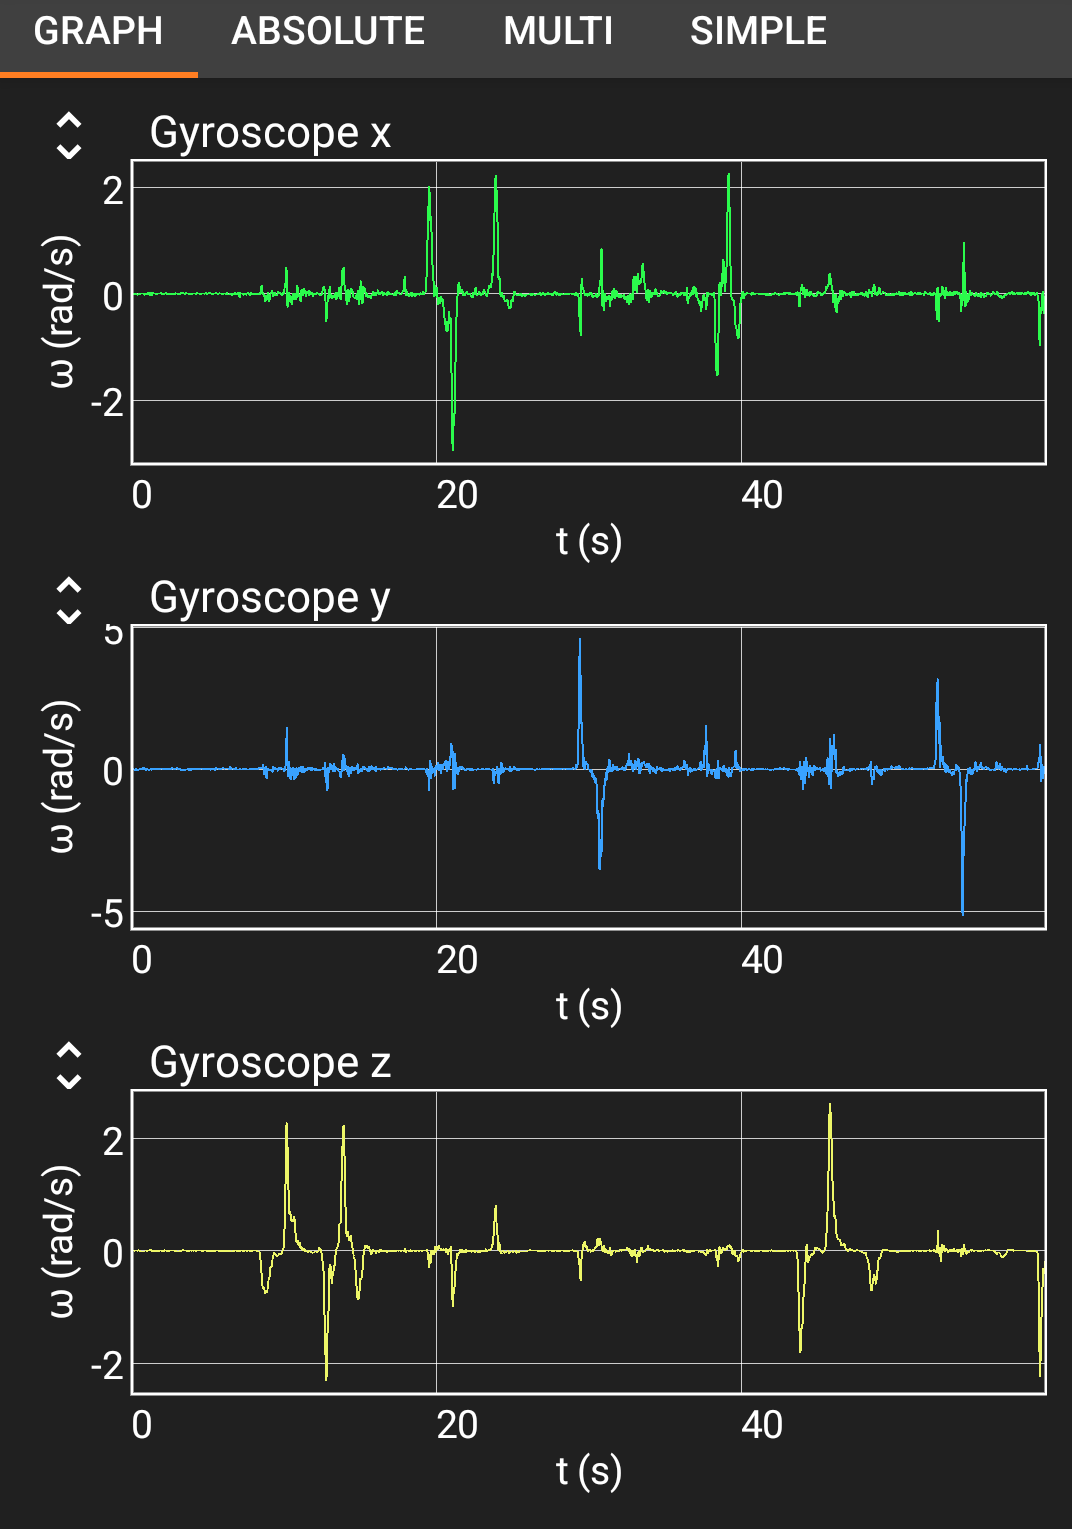

##### Image displaying the trend of Angular Velocity during the No-charging condition
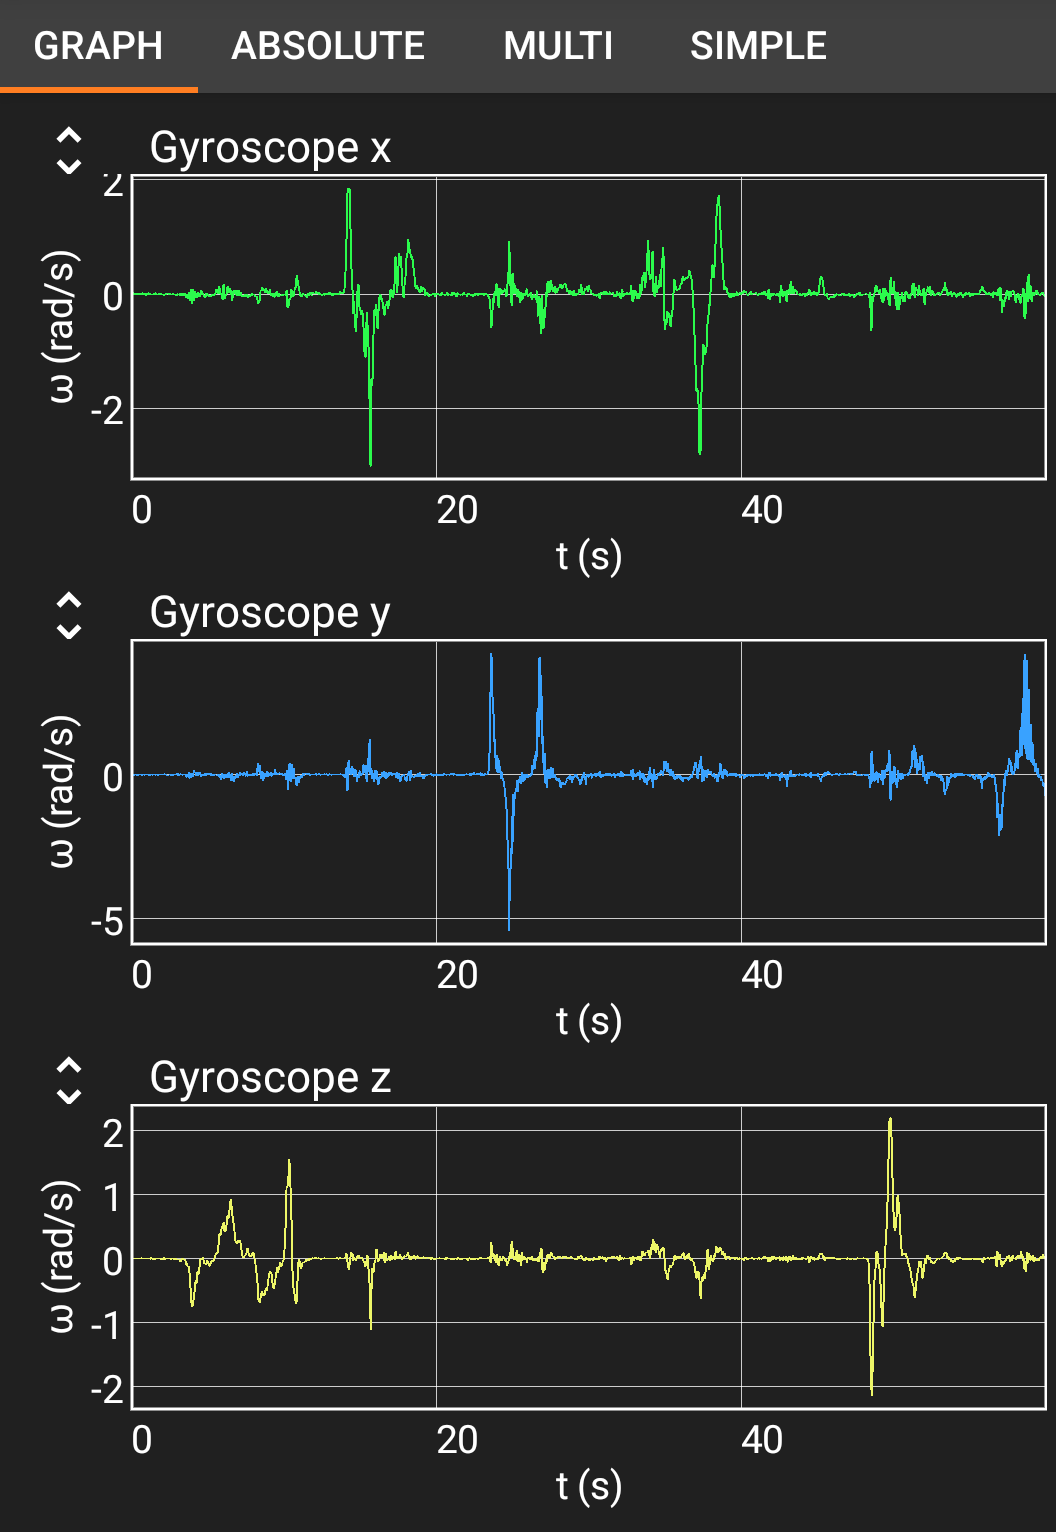

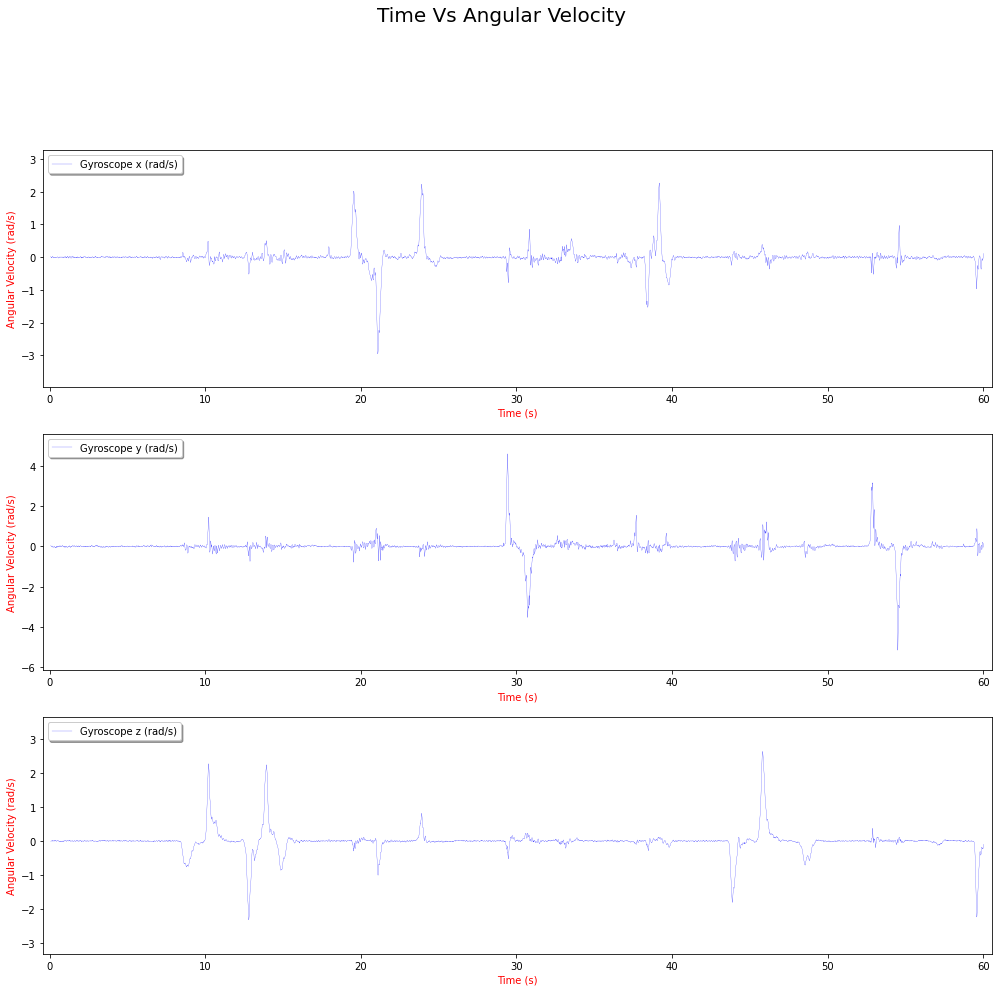

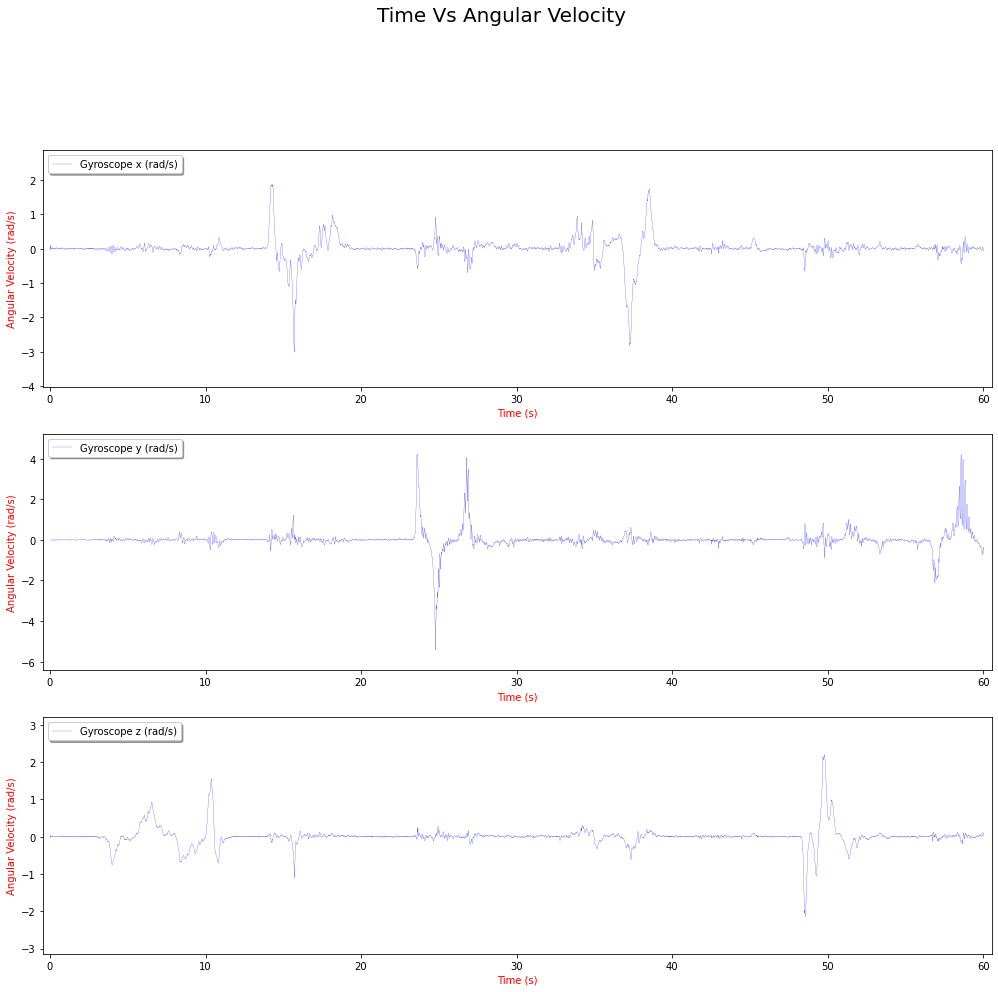

In [74]:
if __name__ == "__main__":
    
        
    # calling the main function with angular velocity datafile with charging conditions
    main(r"C:\Users\Adapala\OneDrive\Desktop\Task\bosch\Datafiles\gyro\gyro_sample02_charge\Raw Data.csv", "gyro_angularvelocity_charging")
    
    # calling the main function with angular velocity datafile without charging conditions
    main(r"C:\Users\Adapala\OneDrive\Desktop\Task\bosch\Datafiles\gyro\gyro_sample02_nocharge\Raw Data.csv","gyro_angularvelocity_Nocharging")



### Gyroscope Sensor Experiment Observations
- I analyzed the graphs of **Time vs Angular Velocity**. From my observations, I found that there was a period of rotation in the Z direction at the beginning, followed by a period of no rotation, and then a period of rotation in the X direction. Additionally, during the rotation in the Y direction, I noticed small spikes that were likely caused by noise and handling errors.

- I used a **power bank to charge my mobile phone, which resulted in less fluctuation** in angular velocity values. 

- The performance of the **Gyroscope sensor** in a mobile phone can be **impacted by its thermal conditions**. If the phone gets too hot, it can reduce the sensitivity of the sensor.

- When we play games for long period, the phone gets heated and at that time, gyroscope may not work properly which leads to improper functionality of some features in the mobile.

- My mobile having **gyroscope Range 34.905556** and **gyroscope Resolution 0.001065233**.

- The "gyroscope Range" refers to the maximum angular velocity that the gyroscope can measure. In this case, it is 34.905556 units of angular velocity.

- The "gyroscope Resolution" refers to the smallest angular velocity that the gyroscope can detect. In this case, it is 0.001065233 units of angular velocity.

## Additional Code
#### The below code useful, if you want to test the individual file. 

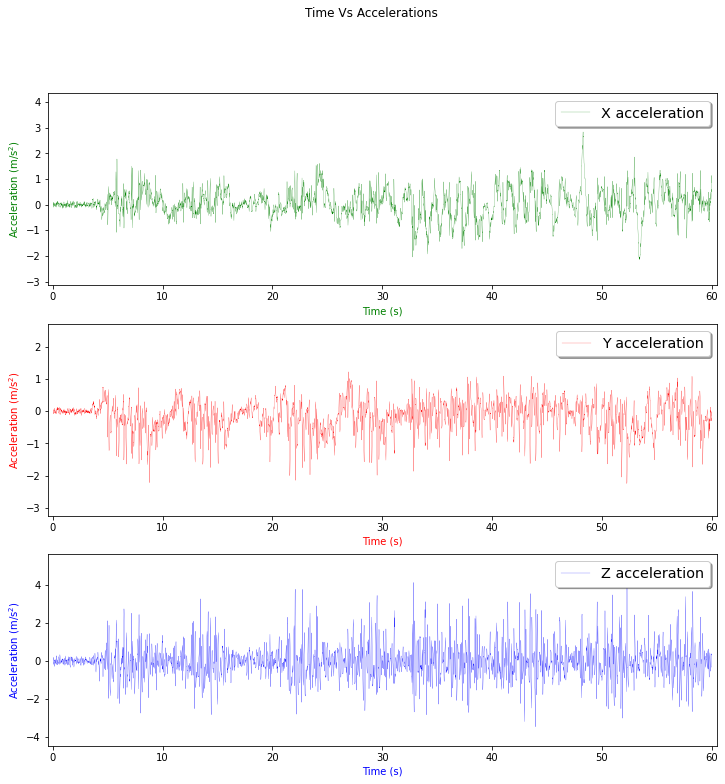

In [75]:
# file details
file_path = r"C:\Users\Adapala\OneDrive\Desktop\Task\bosch\Datafiles\walking\walking_nocharge\Raw Data.csv"
walk_with_g = pd.read_csv(file_path)

# plotting
# Time Vs X acceleration
plt.figure(figsize=(12,12))
plt.suptitle("Time Vs Accelerations")
plt.subplot(3,1,1)
plt.plot(walk_with_g['Time (s)'], walk_with_g['Linear Acceleration x (m/s^2)'], "g-", label="X acceleration", linewidth=0.2)
plt.xlabel("Time (s)", fontdict={'color': 'green'})
plt.ylabel("Acceleration (m/s$^2$)", fontdict={'color': 'green'})
plt.xlim((min(walk_with_g['Time (s)'])-0.5, max(walk_with_g['Time (s)'])+0.5))
plt.ylim((min(walk_with_g['Linear Acceleration x (m/s^2)']) -1, max(walk_with_g['Linear Acceleration x (m/s^2)']) + 1.5))
plt.legend(loc= "upper right", shadow=True, fontsize='x-large')

# Time Vs Y acceleration
plt.subplot(3,1,2)
plt.plot(walk_with_g['Time (s)'], walk_with_g['Linear Acceleration y (m/s^2)'], "r-", label="Y acceleration", linewidth=0.2)
plt.xlabel("Time (s)", fontdict={'color': 'red'})
plt.ylabel("Acceleration (m/s$^2$)", fontdict={'color': 'red'})
plt.xlim((min(walk_with_g['Time (s)'])-0.5, max(walk_with_g['Time (s)'])+0.5))
plt.ylim((min(walk_with_g['Linear Acceleration y (m/s^2)']) -1, max(walk_with_g['Linear Acceleration y (m/s^2)']) + 1.5))
plt.legend(loc= "upper right", shadow=True, fontsize='x-large')

# Time Vs z acceleration
plt.subplot(3,1,3)
plt.plot(walk_with_g['Time (s)'], walk_with_g['Linear Acceleration z (m/s^2)'], "b-", label="Z acceleration", linewidth=0.2)
plt.legend(loc= "upper right", shadow=True, fontsize='x-large')
plt.xlabel("Time (s)", fontdict={'color': 'blue'})
plt.ylabel("Acceleration (m/s$^2$)", fontdict={'color': 'blue'})
plt.xlim((min(walk_with_g['Time (s)'])-0.5, max(walk_with_g['Time (s)'])+0.5))
plt.ylim((min(walk_with_g['Linear Acceleration z (m/s^2)']) -1, max(walk_with_g['Linear Acceleration z (m/s^2)']) + 1.5))

# make sure the file existed in the folder. otherwise it will raise an error 
plt.savefig(r"C:\Users\Adapala\OneDrive\Desktop\Task\bosch\accelerometer.png", dpi=600, facecolor='white')
plt.show()